In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
chunk_size = 10000
chunks = []
for chunk in pd.read_csv('C:\\Users\\Bhavani\\OneDrive\\Desktop\\durga\\Project\\Online Retail.csv',encoding='latin1',chunksize=chunk_size):
    chunks.append(chunk)
data = pd.concat(chunks, ignore_index=True)


In [3]:
print(data.describe())

           Frequency      UnitPrice     CustomerID  Unnamed: 8       Monetary
count  541909.000000  541909.000000  406829.000000         0.0  541909.000000
mean        9.552250       4.611114   15287.690570         NaN      17.987795
std       218.081158      96.759853    1713.600303         NaN     378.810824
min    -80995.000000  -11062.060000   12346.000000         NaN -168469.600000
25%         1.000000       1.250000   13953.000000         NaN       3.400000
50%         3.000000       2.080000   15152.000000         NaN       9.750000
75%        10.000000       4.130000   16791.000000         NaN      17.400000
max     80995.000000   38970.000000   18287.000000         NaN  168469.600000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Frequency    541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
 9   Monetary     541909 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 41.3+ MB
None


In [5]:
print(data.head())


  InvoiceNo StockCode                          Description  Frequency  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER          6   
1    536365     71053                  WHITE METAL LANTERN          6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER          8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE          6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.          6   

      InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  Monetary  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom         NaN     15.30  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom         NaN     20.34  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom         NaN     22.00  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom         NaN     20.34  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom         NaN     20.34  


In [6]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [7]:
max_date = data['InvoiceDate'].max()
data['Recency'] = (max_date - data.groupby('CustomerID')['InvoiceDate'].max()).dt.days


In [8]:
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

In [9]:
data['TotalAmount'] = data['Frequency'] * data['UnitPrice']
monetary = data.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary.columns=['CustomerID','Monetary']

In [10]:
rfm_data = pd.merge(pd.merge(frequency, monetary, on='CustomerID'), data[['CustomerID', 'Recency']].drop_duplicates(), on='CustomerID')

In [11]:
rfm_data = pd.merge(rfm_data, data[['CustomerID','Recency']], on='CustomerID')

In [12]:
print(rfm_data)

         CustomerID  Frequency  Monetary  Recency_x  Recency_y
0           12346.0          2      0.00        NaN        NaN
1           12346.0          2      0.00        NaN        NaN
2           12347.0          7   4310.00        NaN        NaN
3           12347.0          7   4310.00        NaN        NaN
4           12347.0          7   4310.00        NaN        NaN
...             ...        ...       ...        ...        ...
1750425     18287.0          3   1837.28        NaN        NaN
1750426     18287.0          3   1837.28        NaN        NaN
1750427     18287.0          3   1837.28        NaN        NaN
1750428     18287.0          3   1837.28        NaN        NaN
1750429     18287.0          3   1837.28        NaN        NaN

[1750430 rows x 5 columns]


In [13]:
print(data)

       InvoiceNo StockCode                          Description  Frequency  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER          6   
1         536365     71053                  WHITE METAL LANTERN          6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER          8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE          6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.          6   
...          ...       ...                                  ...        ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS         12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL           6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL           4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE          4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT           3   

               InvoiceDate  UnitPrice  CustomerID         Count

In [14]:
average_purchase_value = data.groupby('CustomerID')['TotalAmount'].mean().reset_index()
average_purchase_value.columns = ['CustomerID', 'AvgPurchaseValue']

In [15]:
frequency_of_purchases = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_of_purchases.columns = ['CustomerID', 'FrequencyOfPurchases'] 

In [16]:
key_metrics = pd.merge(average_purchase_value, frequency_of_purchases, on='CustomerID')


In [17]:
print("Key Metrics:")
print(key_metrics)

Key Metrics:
      CustomerID  AvgPurchaseValue  FrequencyOfPurchases
0        12346.0          0.000000                     2
1        12347.0         23.681319                     7
2        12348.0         57.975484                     4
3        12349.0         24.076027                     1
4        12350.0         19.670588                     1
...          ...               ...                   ...
4367     18280.0         18.060000                     1
4368     18281.0         11.545714                     1
4369     18282.0         13.584615                     3
4370     18283.0          2.771005                    16
4371     18287.0         26.246857                     3

[4372 rows x 3 columns]


In [18]:
X = pd.merge(frequency, monetary, on='CustomerID')  
X = pd.merge(X, data[['CustomerID', 'Recency']], on='CustomerID')  
X = X[['Recency', 'Frequency', 'Monetary']] 

In [19]:
print(frequency)

      CustomerID  Frequency
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]


In [20]:
data['Monetary'] = data['Frequency'] * data['UnitPrice']


In [21]:
print(X)

        Recency  Frequency  Monetary
0           NaN          2      0.00
1           NaN          2      0.00
2           NaN          7   4310.00
3           NaN          7   4310.00
4           NaN          7   4310.00
...         ...        ...       ...
406824      NaN          3   1837.28
406825      NaN          3   1837.28
406826      NaN          3   1837.28
406827      NaN          3   1837.28
406828      NaN          3   1837.28

[406829 rows x 3 columns]


In [22]:
if 'Frequency' in data.columns:
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    max_date = data['InvoiceDate'].max()
    data['Recency'] = (max_date - data['InvoiceDate']).dt.days
    X = data[['Recency', 'Frequency','Monetary']]
    k = 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Recency', 'Frequency','Monetary'])
    print("Cluster Centers:")
    print(cluster_centers)
else:
    print("Column 'Frequency' not found in the DataFrame.")


Cluster Centers:
      Recency    Frequency       Monetary
0  157.403281      9.55232      17.987928
1  162.500000 -77605.00000 -122826.600000
2  325.000000  74215.00000   77183.600000
3    0.000000  80995.00000  168469.600000


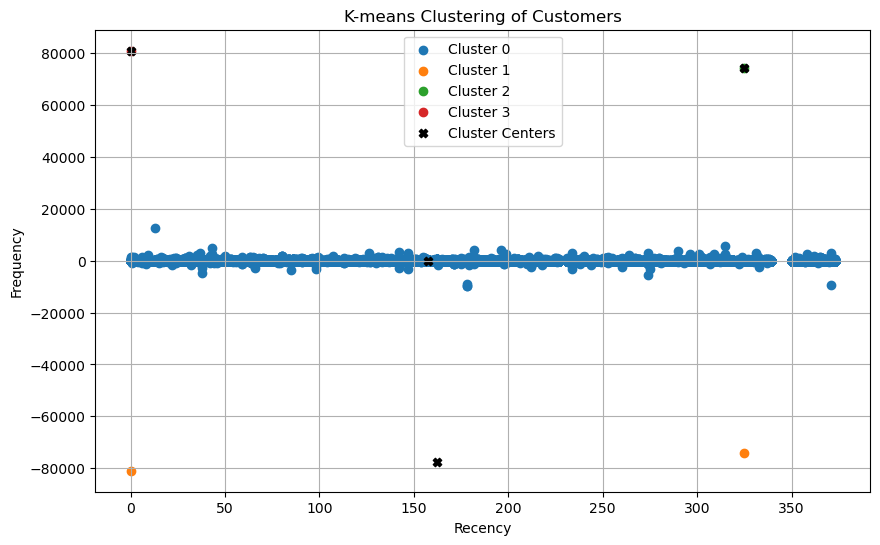

In [23]:
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    cluster_data = data[data['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Recency'], cluster_data['Frequency'], label=f'Cluster {cluster_label}')
plt.scatter(cluster_centers['Recency'], cluster_centers['Frequency'], marker='X', color='black', label='Cluster Centers')

plt.title('K-means Clustering of Customers')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Bhavani\AppData\Local\Temp\ipykernel_10988\2292103115.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Cluster', y='Monetary', estimator=sum, ci=None, palette='viridis')


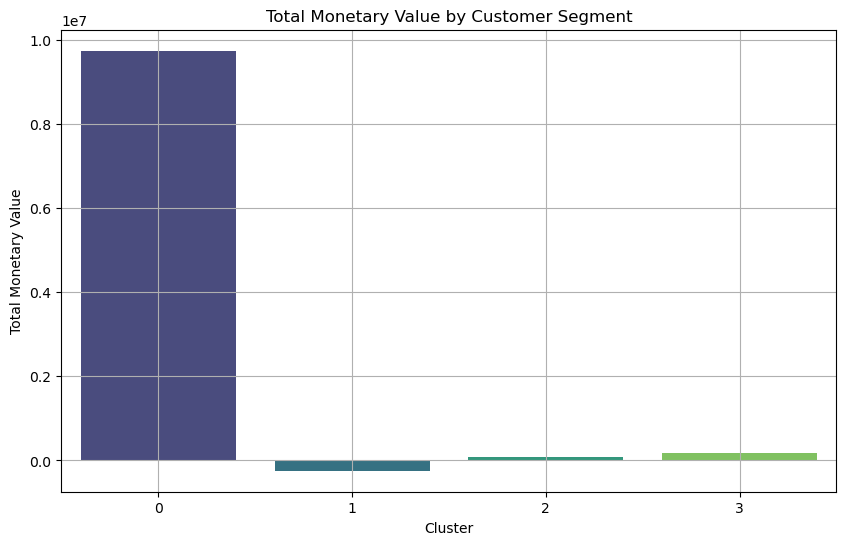

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Cluster', y='Monetary', estimator=sum, ci=None, palette='viridis')
plt.title('Total Monetary Value by Customer Segment')
plt.xlabel('Cluster')
plt.ylabel('Total Monetary Value')
plt.grid(True)
plt.show()

In [25]:
def analyze_segments(data):
    insights = {}
    segment_0 = data[data['Cluster'] == 0]
    insights['Segment 0'] = {
        'Characteristics': 'Customers in this segment have made purchases less frequently and have not spent much money recently.',
        'Insights': 'These customers might be inactive or occasional buyers. They may need incentives or promotions to encourage repeat purchases.',
        'Recommendations': 'Send personalized offers, discounts, or reminders to re-engage these customers. Provide loyalty rewards or exclusive deals to incentivize future purchases.'
    }
    
    segment_1 = data[data['Cluster'] == 1]
    insights['Segment 1'] = {
        'Characteristics': 'Customers in this segment have made frequent purchases and spent a significant amount of money recently.',
        'Insights': 'These are high-value, loyal customers who are actively engaged with the business.',
        'Recommendations': 'Provide VIP treatment, exclusive access, or loyalty rewards to reinforce their loyalty. Offer personalized recommendations or upselling opportunities to increase their lifetime value.'
    }
    segment_2 = data[data['Cluster'] == 2]
    insights['Segment 2'] = {
        'Characteristics': 'Customers in this segment have made high-value purchases but less frequently, and they have not made recent purchases.',
        'Insights': 'These customers may be occasional big spenders who make large purchases infrequently.',
        'Recommendations': 'Encourage repeat purchases with targeted promotions or reminders. Offer incentives for larger or more frequent purchases to increase their engagement.'
    }
    segment_3 = data[data['Cluster'] == 3]
    insights['Segment 3'] = {
        'Characteristics': 'Customers in this segment make frequent purchases but with low monetary value, and they have not made recent purchases.',
        'Insights': 'These customers are likely to be bargain hunters or small-ticket item buyers.',
        'Recommendations': 'Offer low-price or bundle deals to encourage more frequent purchases. Provide personalized recommendations or cross-selling opportunities to increase their average order value.'
    }
    return insights
segment_insights = analyze_segments(data)
for segment, insight in segment_insights.items():
    print(f"Segment: {segment}")
    print(f"Characteristics: {insight['Characteristics']}")
    print(f"Insights: {insight['Insights']}")
    print(f"Recommendations: {insight['Recommendations']}")
    print()


Segment: Segment 0
Characteristics: Customers in this segment have made purchases less frequently and have not spent much money recently.
Insights: These customers might be inactive or occasional buyers. They may need incentives or promotions to encourage repeat purchases.
Recommendations: Send personalized offers, discounts, or reminders to re-engage these customers. Provide loyalty rewards or exclusive deals to incentivize future purchases.

Segment: Segment 1
Characteristics: Customers in this segment have made frequent purchases and spent a significant amount of money recently.
Insights: These are high-value, loyal customers who are actively engaged with the business.
Recommendations: Provide VIP treatment, exclusive access, or loyalty rewards to reinforce their loyalty. Offer personalized recommendations or upselling opportunities to increase their lifetime value.

Segment: Segment 2
Characteristics: Customers in this segment have made high-value purchases but less frequently, and

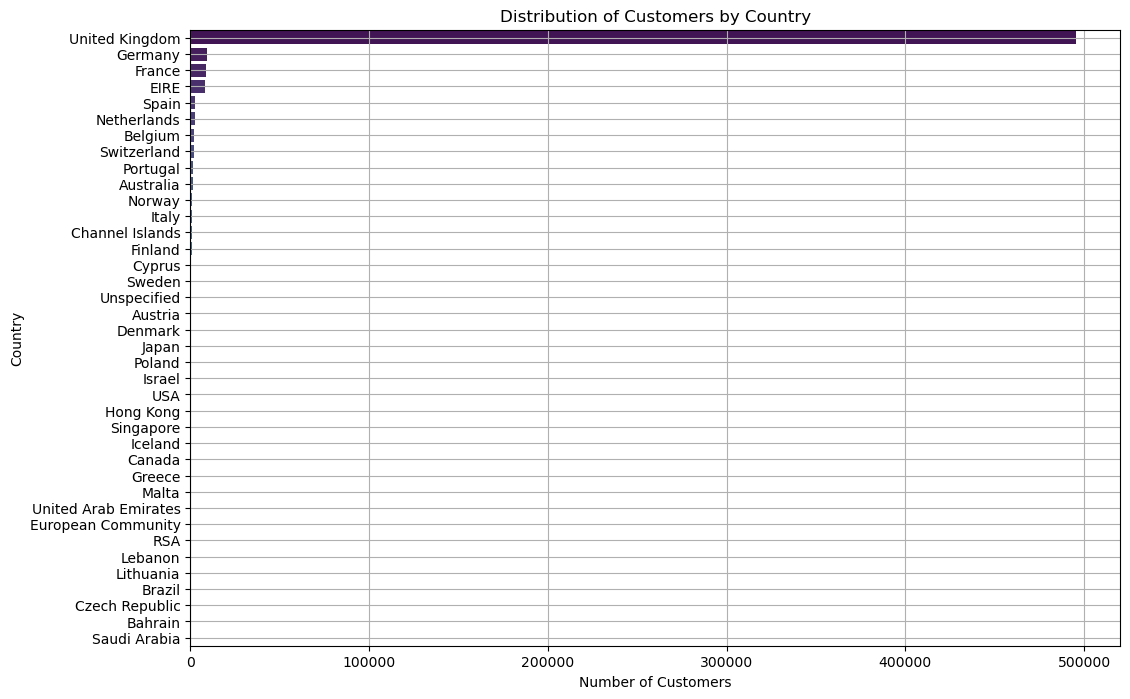

In [26]:
plt.figure(figsize=(12, 8))
country_counts = data['Country'].value_counts().sort_values(ascending=False)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Distribution of Customers by Country')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.grid(True)
plt.show()

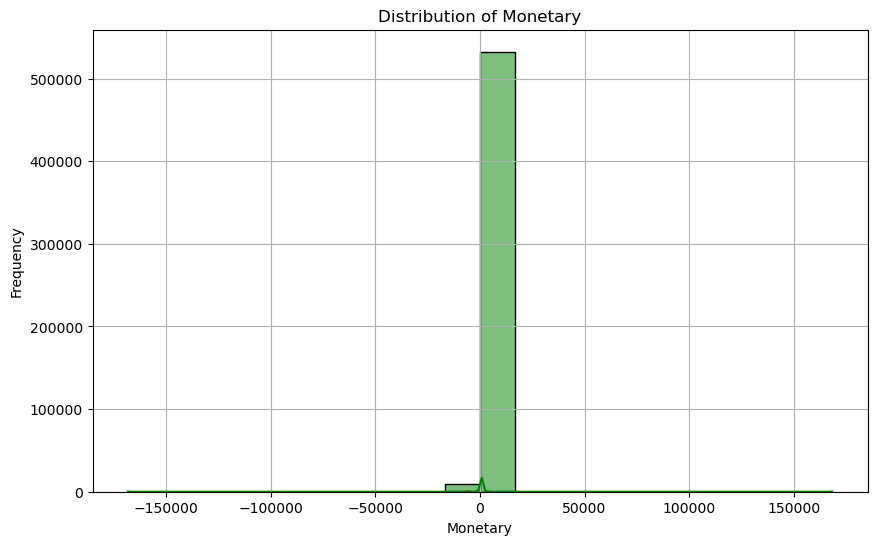

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Monetary'], bins=20, kde=True, color='green')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

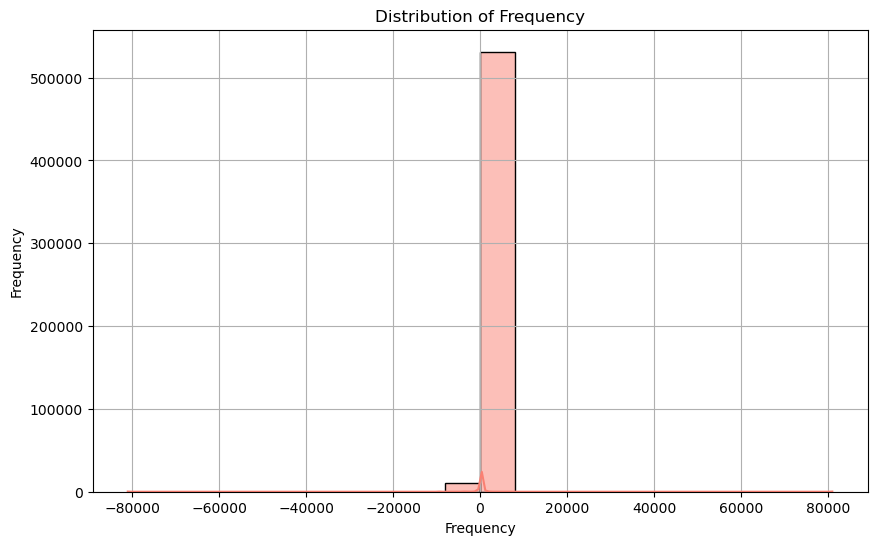

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Frequency'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

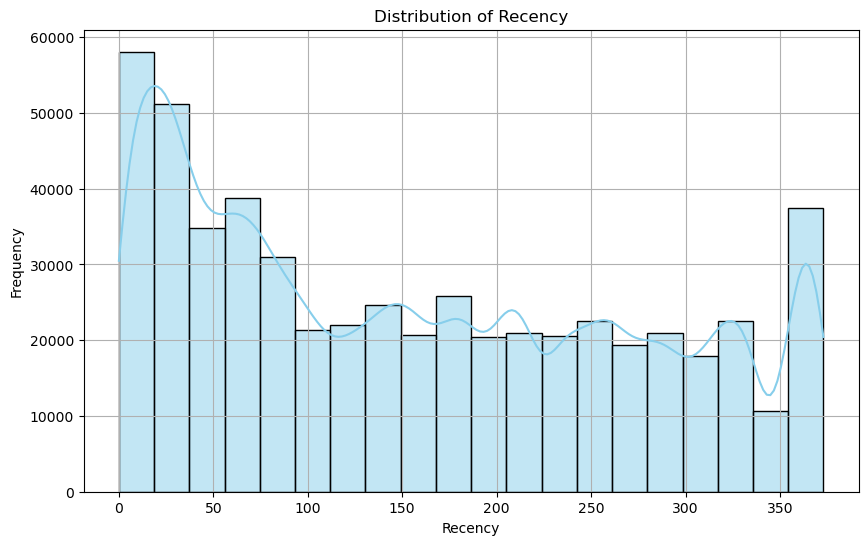

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Recency'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()